In [1]:
# Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

In [2]:
# Loading the digits dataset and applying standard scaling
digits = load_digits()
X = digits.data
y_true = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Reducing dimensions to 2 using PCA for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [4]:
# Helper function to plot clusters using PCA components
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.grid(True)
    plt.show()


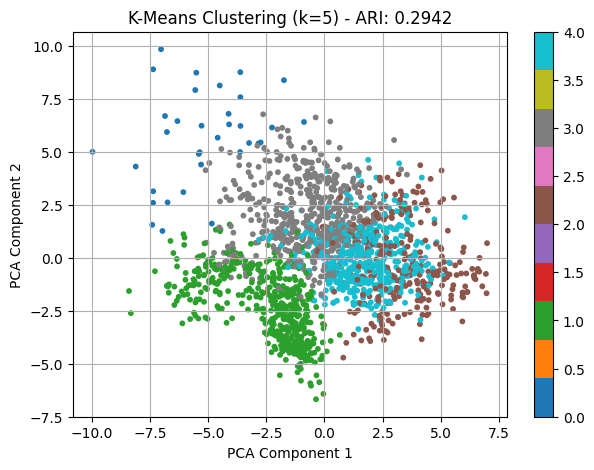

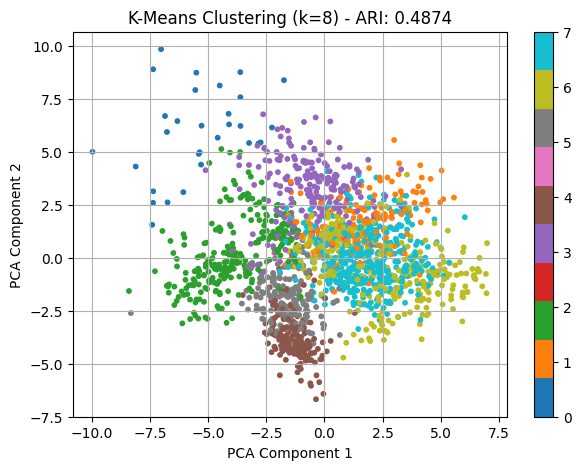

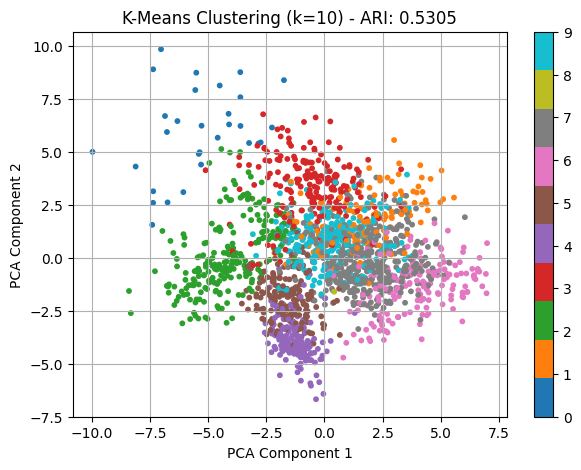

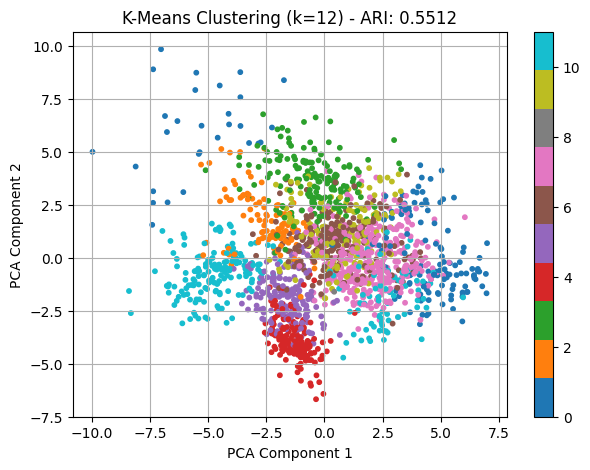

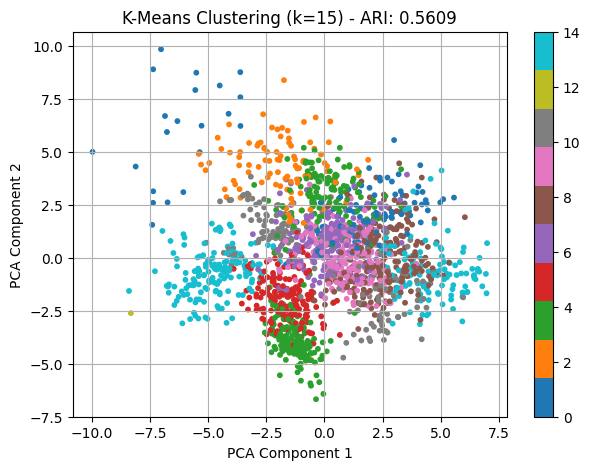

In [5]:
# Running KMeans for different values of k and visualizing results
k_values = [5, 8, 10, 12, 15]
ari_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ari = adjusted_rand_score(y_true, labels)
    ari_scores.append((k, ari))
    plot_clusters(X_pca, labels, f'K-Means Clustering (k={k}) - ARI: {ari:.4f}')


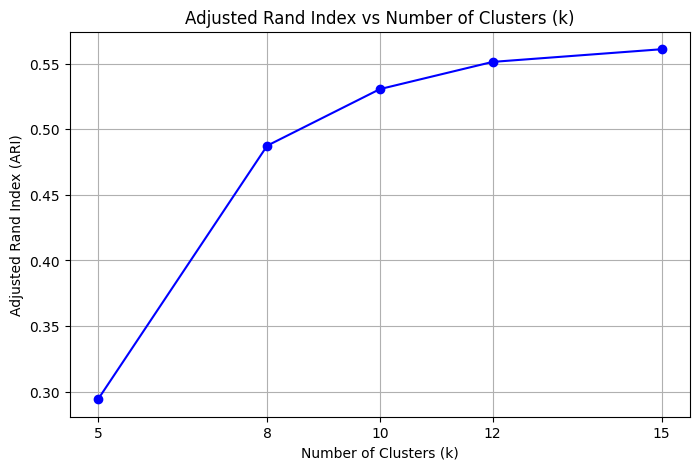

In [6]:
# Plotting ARI scores for all tested values of k
ks, aris = zip(*ari_scores)
plt.figure(figsize=(8, 5))
plt.plot(ks, aris, marker='o', linestyle='-', color='blue')
plt.title("Adjusted Rand Index vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.xticks(ks)
plt.grid(True)
plt.show()


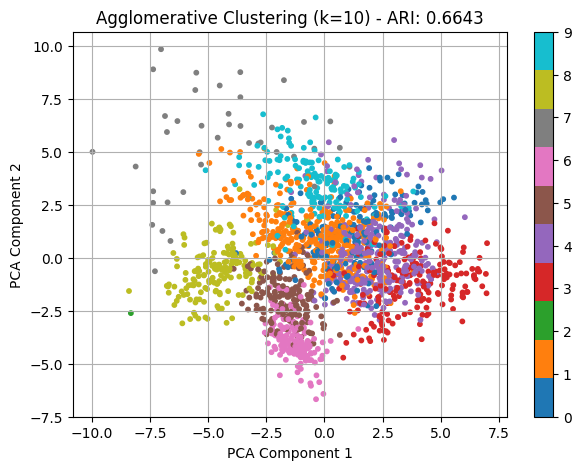

In [7]:
# Running Agglomerative Clustering with 10 clusters and visualizing
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_ari = adjusted_rand_score(y_true, agglo_labels)

plot_clusters(X_pca, agglo_labels, f'Agglomerative Clustering (k=10) - ARI: {agglo_ari:.4f}')


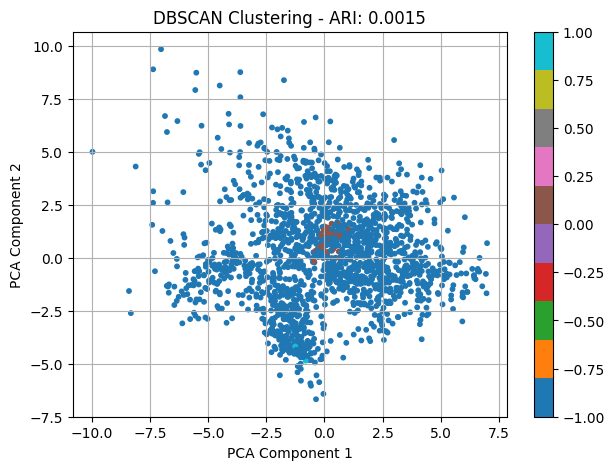

In [8]:
# Running DBSCAN with tuned eps value and visualizing results
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_ari = adjusted_rand_score(y_true, dbscan_labels)

plot_clusters(X_pca, dbscan_labels, f'DBSCAN Clustering - ARI: {dbscan_ari:.4f}')


In [9]:
# Displaying a summary table of ARI scores for all clustering algorithms
import pandas as pd

summary_data = pd.DataFrame({
    'Algorithm': ['KMeans (k=5)', 'KMeans (k=8)', 'KMeans (k=10)', 'KMeans (k=12)', 'KMeans (k=15)', 
                  'Agglomerative (k=10)', 'DBSCAN'],
    'ARI Score': [ari for _, ari in ari_scores] + [agglo_ari, dbscan_ari]
})

print("\n📌 Clustering Performance Summary (Adjusted Rand Index):")
display(summary_data)



📌 Clustering Performance Summary (Adjusted Rand Index):


,Algorithm,ARI Score
0,KMeans (k=5),0.294241
1,KMeans (k=8),0.487400
2,KMeans (k=10),0.530512
3,KMeans (k=12),0.551241
4,KMeans (k=15),0.560898
5,Agglomerative (k=10),0.664346
6,DBSCAN,0.001501
